# Lesson 19: Optional Mobile Robot Localization and SLAM

**Lesson learning outcomes:**

By completing this lesson, you will be better able to:

- **outline** the issues and problems associated with a mobile robot localising its position within an environment
- **discuss** the sources of uncertainty in robot localization, particularly motion noise, sensor noise, sensor aliasing, and initial uncertainty
- **apply** your knowledge of robot localization to simulate a mobile robot navigating an environment

**In this lesson, you learn about the localization and some of the issues and problems associated with a mobile robot localising its position within an environment. We also discuss how a localization and mapping work in parallel.**

## Localization

A mobile robot navigating in an environment needs to know its position within that environment. We call this **robot localization** and often refer to the robot's environment as the "map" when discussing robot localization. The localization task is not always straightforward for a robot because there are many sources of noise that confuse the robot about its location.

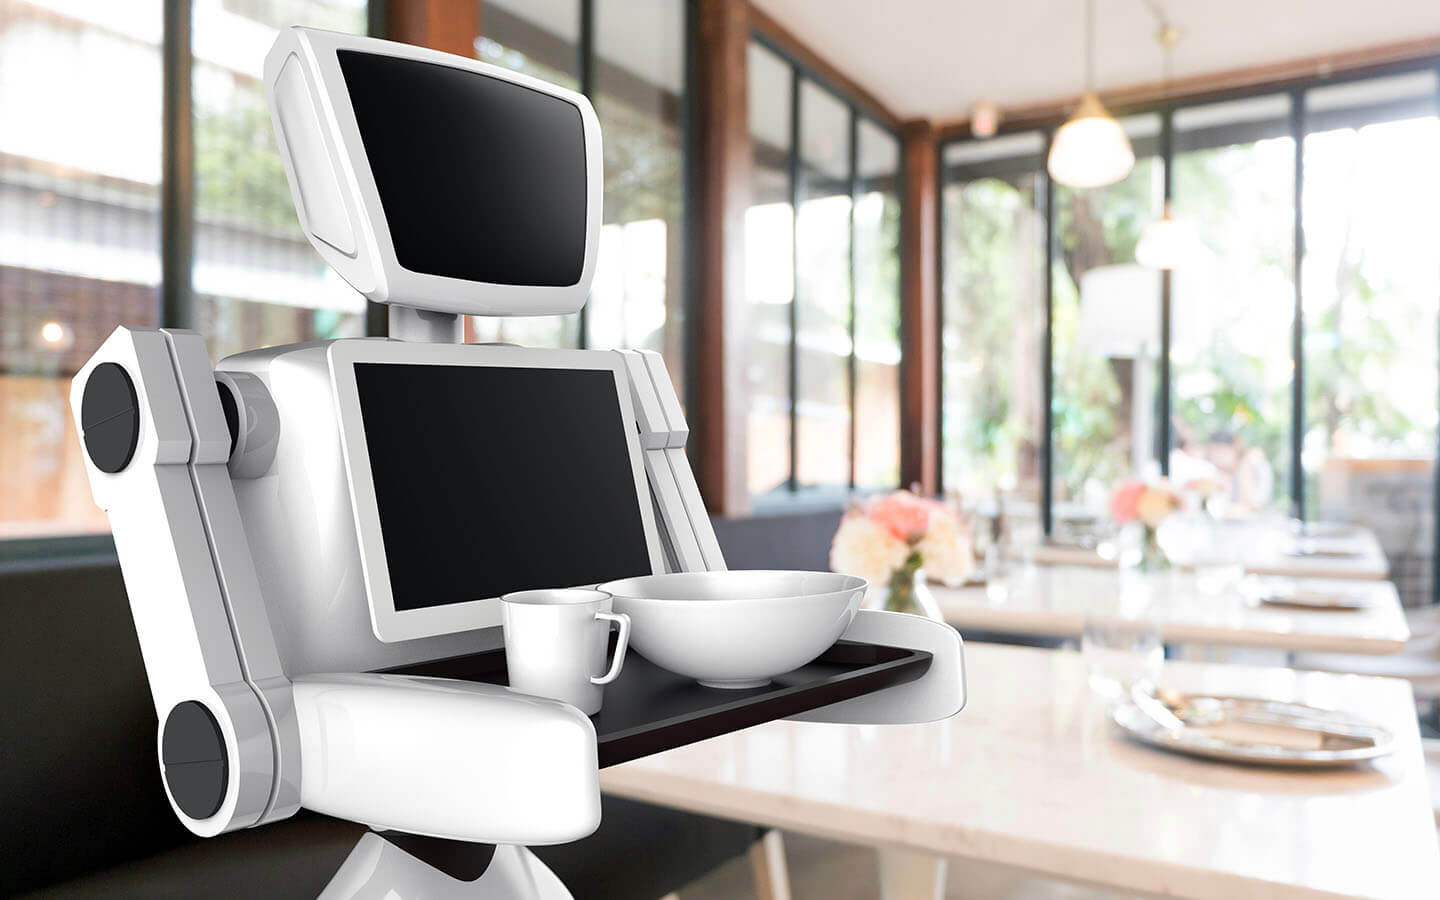

**Localization** tries to answer the question of how a mobile robot can know where it is in any given environment. Consider the mobile waiter robot in Figure 3.1 that needs to navigate around a restaurant environment. The waiter robot has the task of taking orders from customers and delivering their food from the kitchen when it is ready. To complete this task it needs to move around the tables, or obstacles, in this environment. For the robot to successfully move to a particular table or to the kitchen, it needs to know its current location (the **start** of moving) and its desired location (**goal** of moving).

As the robot waiter navigates around the restaurant, it needs to know where it is, or **localize** itself. We can make solving the question of localization easier by assuming that when the restaurant owner first turns on the robot, they tell it where it is. This means that the waiter robot knows perfectly where it is at the beginning, because the restaurant owner set its start position. In the real world, there are factors that make it difficult to be certain of a robot's start position, but to introduce localization, we will assume that the restaurant owner is able to do that accurately in our restaurant example.

## Dead reckoning or odometry

Next, the restaurant opens, and the owner sets the robot to work waiting on tables. The waiter robot starts to move to complete tasks. When it does this, it tries to keep track of its **pose** using **dead reckoning**.

- **Pose** is the location and rotation for our waiter robot.
- **Dead reckoning** (also called **odometry**) is the process the robot uses to calculate its current position, using a previously determined position and estimated speeds over an elapsed time.

The waiter robot can use knowledge it has of its wheels in order to complete dead reckoning. It knows the orientation and size of its wheels, plus the speed at which they are rotating, and it is able to compute its own velocity at any point in time. It can integrate these velocities to calculate its current position as it continues to move in an environment.

**Example:** "Waiter robot calculates its new position"

Using its knowledge of its wheels (size, orientation, velocity of rotation):

- the waiter robot waiting at starting position, **X**, can calculate that if it moves in a forward direction for one metre at a known velocity, it can update its position in its internal environment map by one metre forward, **X + 1**.

## Effector noise or motion uncertainty

The problem with dead reckoning is that even if the restaurant owner commands the robot to move with a certain velocity, its actual motion will be different. This can be due to:

- **imperfections in robot structure**, for example, one wheel is not fully inflated and does not move as far as the robot expects;
- **the environment**, for example, there are bumps on the ground, or a surface which cause the wheels to slip or skid.

These factors mean that when the robot completes the calculation to move forward one metre, it is likely to move less than one full metre forward. The robot will not be in the pose that its calculation suggests it will be located.

Therefore, there will always be imperfections in the way a robot moves, even if these are very minor, because of multiple imperfections in the environment. These imperfections add up. If the robot only considers the rotation of its wheels, there will be a significant difference between the data the robot is using to calculate its location and what the restaurant owner observes about the position of their waiter robot. In the real world, there are always factors that mean a robot never moves exactly as its owner intended it to move.

These factors are called **effector noise** or sometimes **motion uncertainty, or actuator noise**. The term effector noise relates to special sensors found on a robot that we call **effectors**. Effectors are similar to other sensors in that they receive information about the environment, but robots also use them to move in an environment.

**Errors in a robot's knowledge of its position tend to accumulate over time. In this short video, we explains why this happens.**

[Link to the Video](https://mymedia.leeds.ac.uk/Mediasite/Play/3dc072c76e7f45129d18fae4d88299771d)


The video is approximately 3-minutes long.

<a href="https://minerva.leeds.ac.uk/bbcswebdav/xid-25161125_4" target="_blank">Download transcript (PDF).</a>

## Sensors used to identify environmental features

So far, we have established the idea that even if the robot knows its starting pose perfectly, as it moves in the real world, its knowledge of its location becomes more and more uncertain. We can solve this uncertainty by adding sensors to a robot that enable it to gather data on environmental features to figure out where it exactly is.

**In this video, we explains the principles of using sensors so that a robot can estimate its own position as it moves within an environment. He uses the example of a single beam range sensor to explain why it is common to have uncertainty over the exact position of a robot, or localization uncertainty, and introduces the term sensor noise.**

<iframe title="107AI_vid020_U1L2_sensorUncertainty" width="900" height="600" frameborder="0" scrolling="auto" marginheight="0" marginwidth="0" src="https://mymedia.leeds.ac.uk/Mediasite/Play/1e983412035f46e792dafddfd5d6b06e1d" allowfullscreen msallowfullscreen allow="fullscreen"></iframe>

[Link to the Video](https://mymedia.leeds.ac.uk/Mediasite/Play/1e983412035f46e792dafddfd5d6b06e1d)

The video is approximately 8-minutes long.
<a href="https://minerva.leeds.ac.uk/bbcswebdav/xid-25170701_4" target="_blank">Download transcript (PDF).</a>

**"Summary of localization uncertainty from the video"**

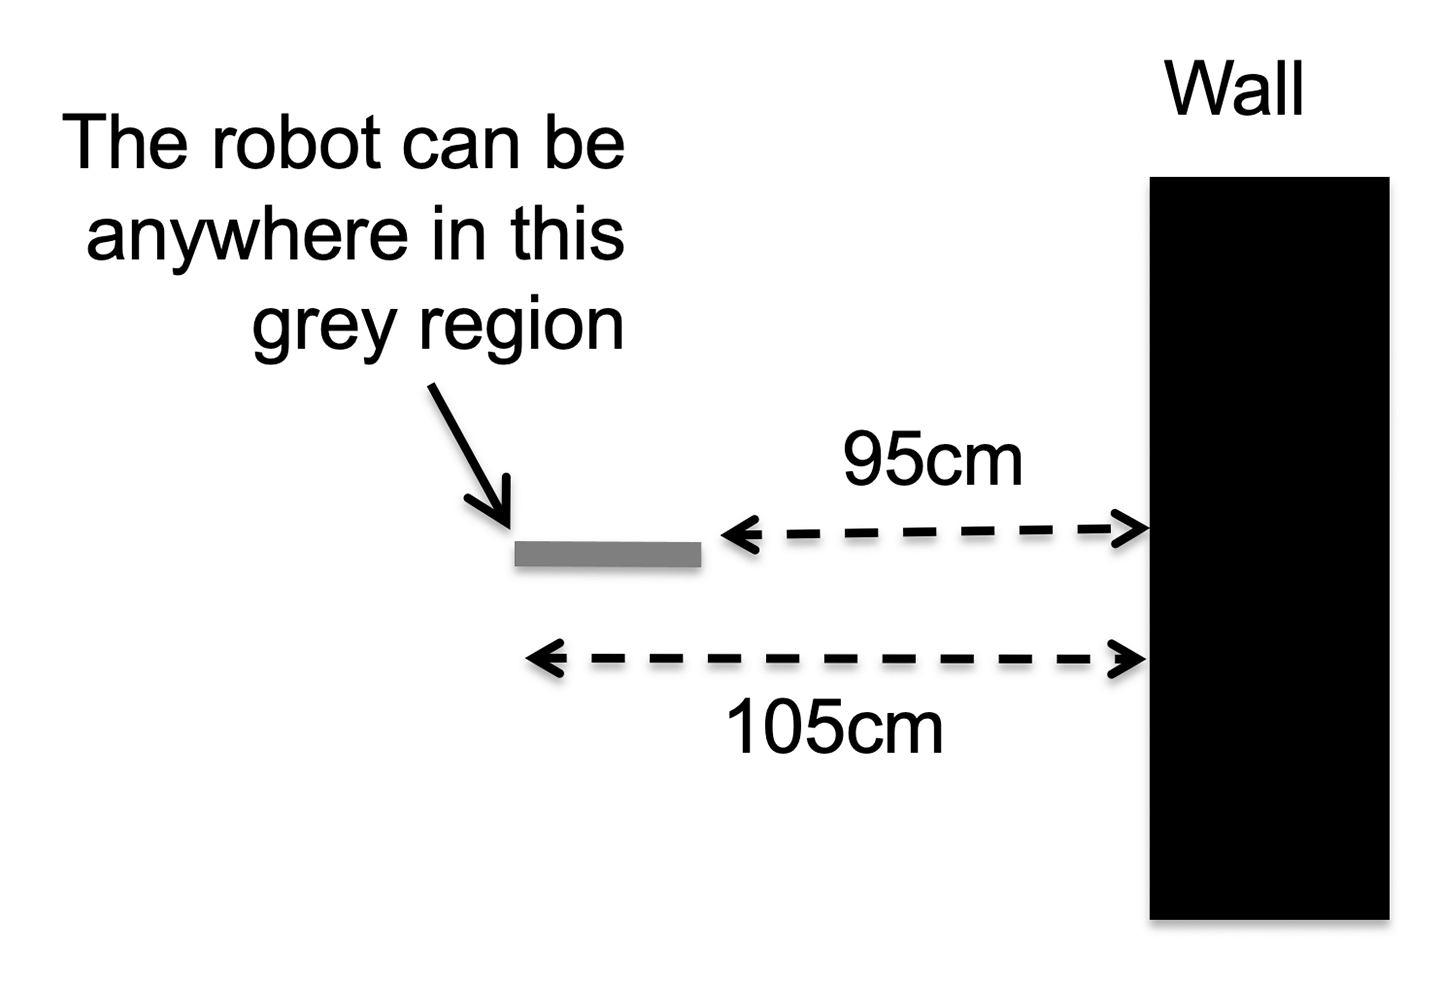

In the video, you saw that both effector noise and sensor noise result in localization uncertainty for a robot. We noted that:

- we can use sensors to aid a robot to localize its position in an environment. For example, in Figure 3.2 above, we can predict that the robot will be somewhere in the grey region of the environment

- a single reading from a sensor does not usually provide an accurate enough localization for a robot. A robot needs to take many readings to be more certain of its location, and as it moves, it will need to continually take sensor readings to update its location

- in the real world, it will never be possible to narrow down a robot’s position to a single point due to sensor noise.

Having considered sensor noise, you saw that there is another source of uncertainty, for example when a robot moves parallel to the surface of an object. We call this uncertainty **sensor aliasing**, when different robot poses result in the same sensor values.

We observed a robot in the environment shown in Figure 3.3 below, and saw that when it reads that it is 100cm from the wall, it is actually somewhere in the grey region due to the combined uncertainty due to sensor noise and sensor aliasing.

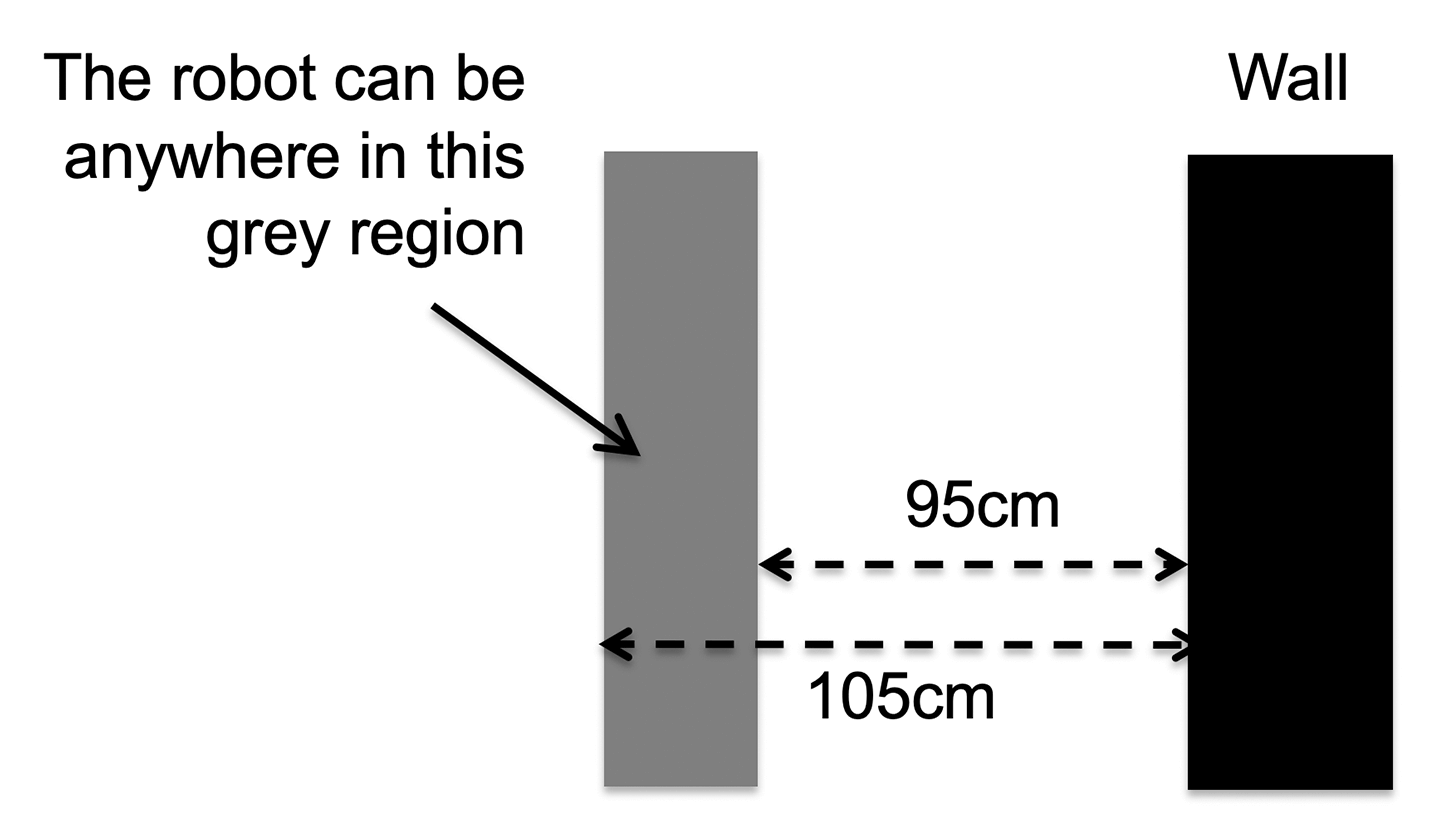


## Localization algorithms

Localization algorithms enable a robot to estimate its pose, or localize, in a given map as accurately as possible in the face of all these uncertainties.

Over the next three Lessons we will study how to use sensors and apply this to a simulated TurtleBot in the Activities that accompany some of the Lessons. We will integrate the information coming from the sensors with the information coming from the wheels to localize a robot in a given environment.  We are focusing on this because it is the most general solution to this problem of localization for your robot. It will use sensors and actuators and as it moves, you will integrate all this information.

Here are other ways to make it easy for a robot to localize if you are able to structure the environment artificially.

### Example 1: Robot system in a factory

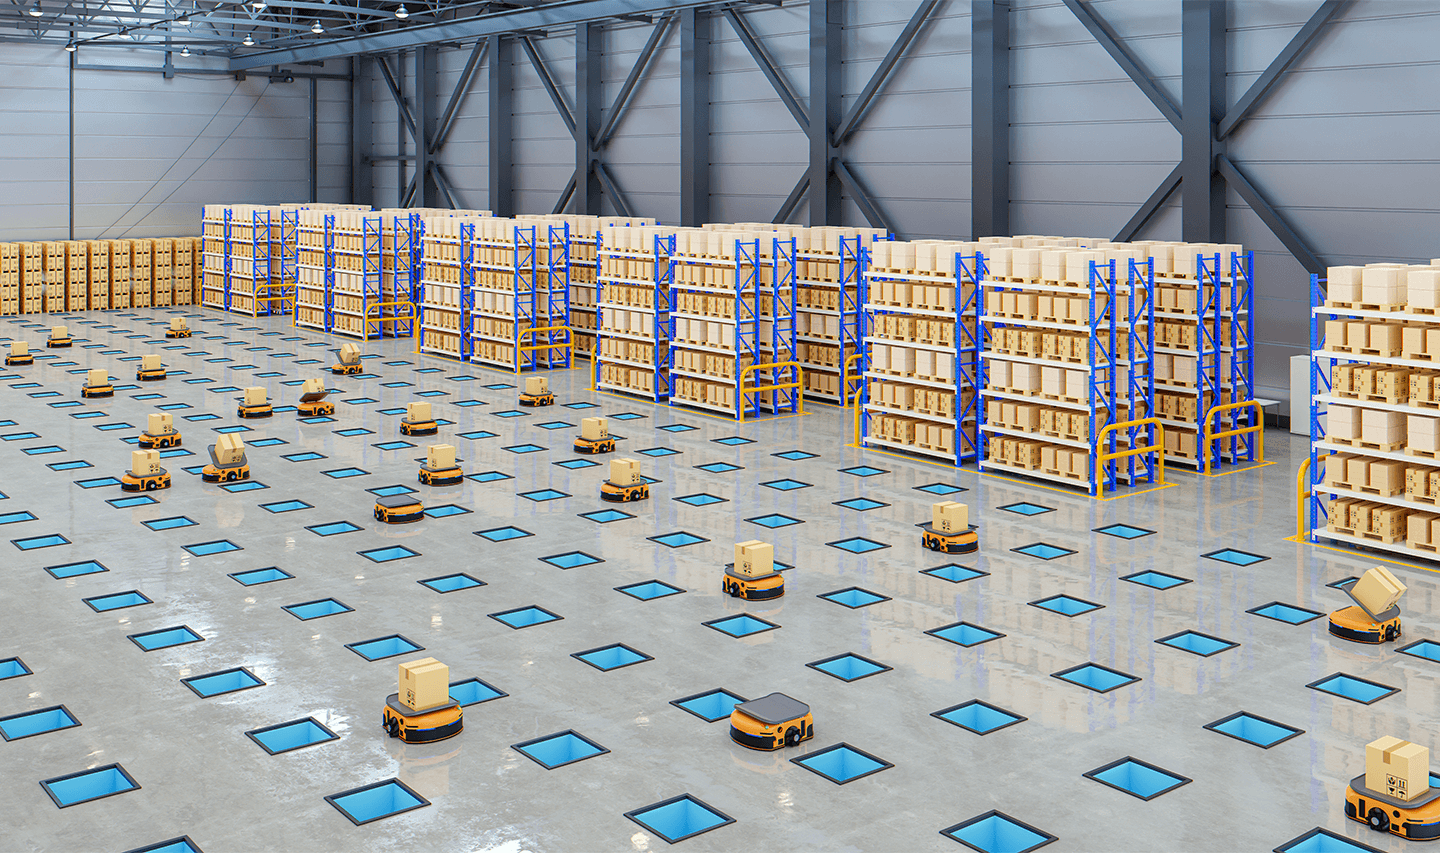

In this example, where only robots inhabit a factory space, you can place markers in the environment. In Figure 3.4 is a typical distribution warehouse. You can see small white squares (similar to the Unique marker shown in Figure 3.5) at equal distances between each other on the floor surface of the factory. The robots have cameras that look down onto the floor. When a camera sees the marker, it can wirelessly ask the computer system where that marker is in the warehouse. Each marker has a unique position in the warehouse, so this system allows the robot to know exactly where it is within this engineered environment.

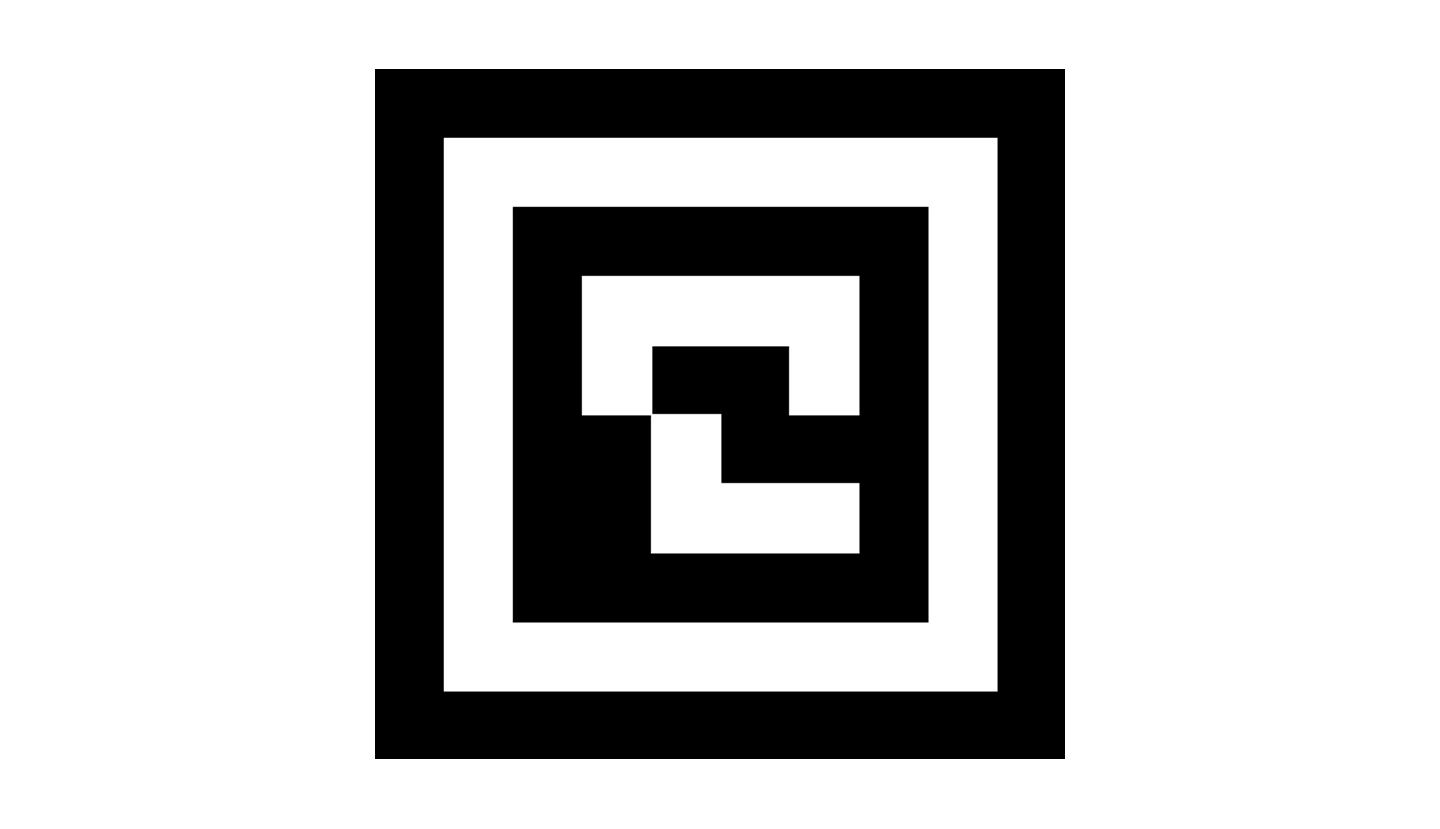

**Figure 3.5** Unique marker with known absolute 2D position in the map. These markers are sometimes called «AR marker» due to their popular use in Augmented Reality.</p>

### Beacon-based localization with augmented reality markers

Flying robots can also use similar markers on the ground to the unique marker shown in Figure 3.5. These markers are sometimes called «AR marker» due to their popular use in Augmented Reality. Each marker is different has the location information encoded into it. For flying robots using this method of beacon-based localization, the robot has a camera that it uses to localize itself using these markers in the environment.

### Motion capture systems

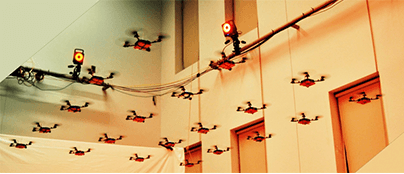

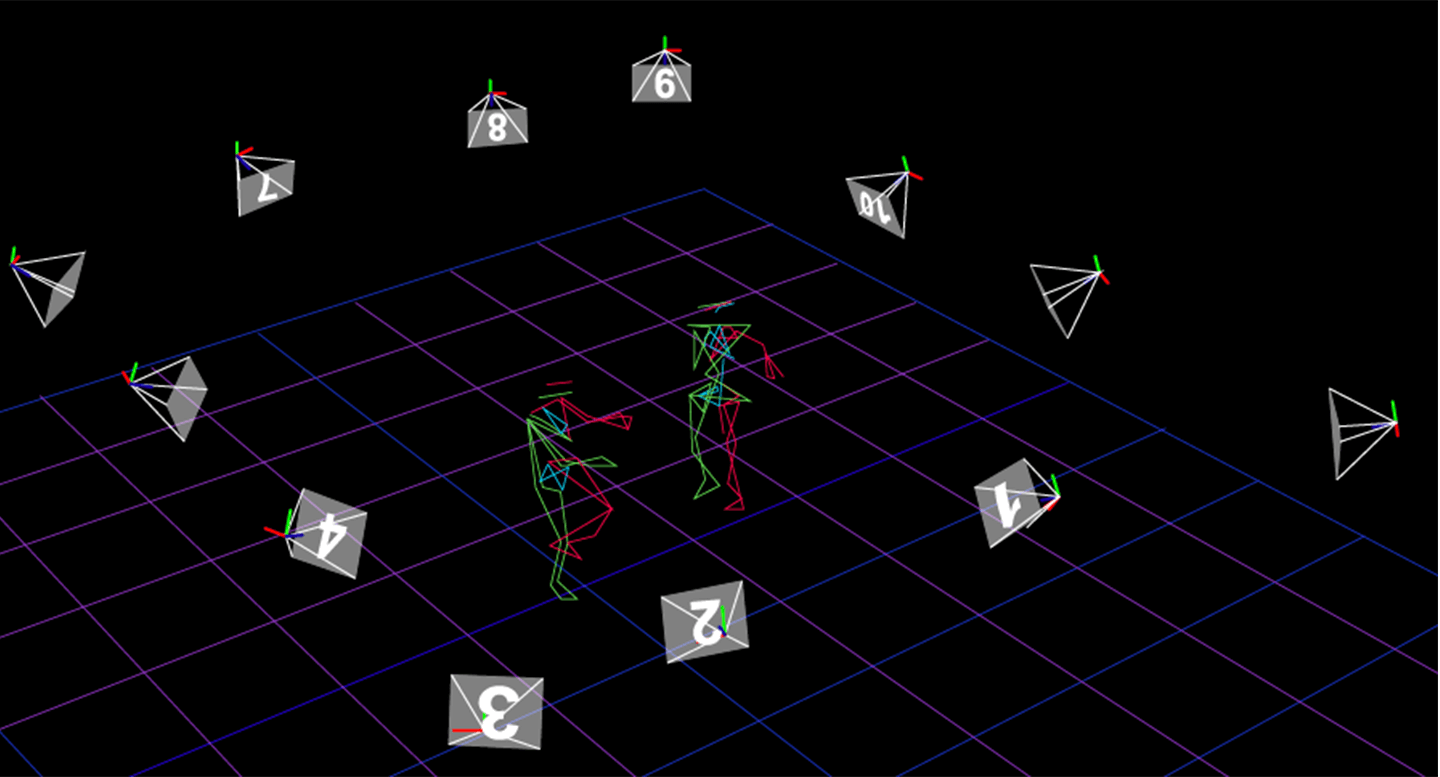

You can also arrange it the other way with a marker on the robot and cameras in the environment in a **motion capture system**. With cameras around the edge of an environment (circle shape in Figure 3.6 and pyramid shapes in Figure 3.7), you can place markers on the robots moving in this environment. This method facilitates having many robots in an environment such as Figure 3.6, because cameras in the environment can detect each robot's unique marker. You can estimate the location of each robot via its unique marker because you can accurately set the position of each camera in the environment.

See how in Figure 3.7 we can also use this technology in augmented reality. With sensors placed on a person moving in the environment, you can build structures of a person’s motion, giving this method the name motion capture systems.

Cameras for a motion capture system usually have the following properties:

- High resolution (from VGA up to 16 Mpixels)
- Very high frame rate (several hundreds of Hz)
- Good for ground truth reference and multi-robot control strategies
- Popular brands:
  - VICON (10kCHF per camera),
  - OptiTrack (2kCHF per camera)

**Example "Making a TurtleBot motion capture system"**

Think about the Turtlebot you will use in this module. You can set up a motion capture system with cameras in the corners of the room and a visible marker on the Turtlebot. You will have an accurate position for your TurtleBot in the environment at any point in time. This requires you to engineer the environment, and consider the location of the camera so that the robot is visible at all times. If the robot is not visible to the camera, then you will not be able to locate the robot.

## Different Approaches to Localization

The first approach to localization is probabilistic approach. 

### Probabilistic approach to localization

The best way to address the localization problem is by viewing these issues mathematically as a probabilistic inference problem. In other words, we represent the robot’s pose in the environment as a probability distribution, instead of a single value. We then update this probability distribution according to how the robot moves and what the robot sensors perceive.

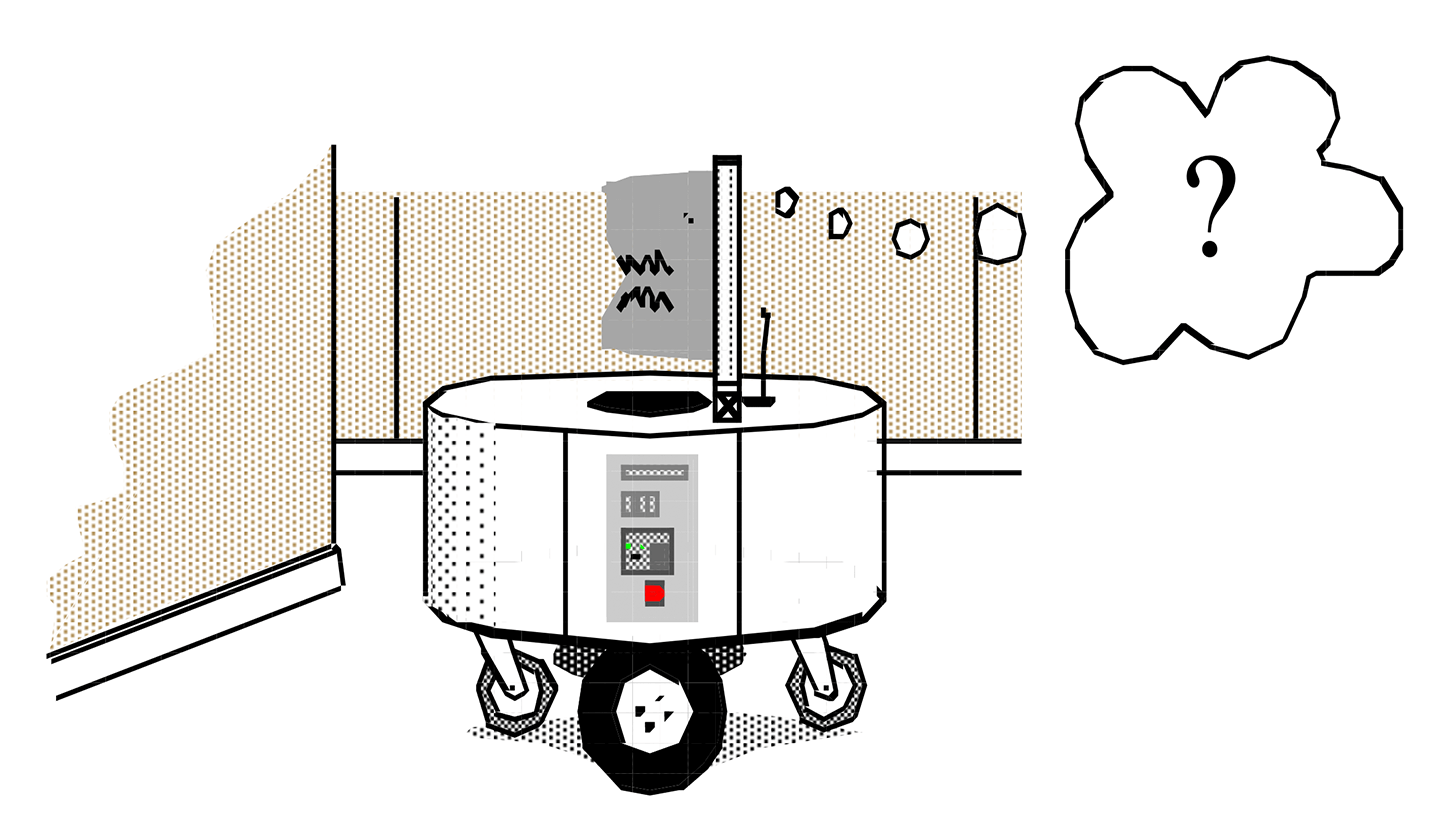

When you place a robot in an environment and switch it on, it will not know where it is. It needs some method or algorithms determine its location using the methods we discussed in the last lesson, i.e.:

- odometry or dead reckoning
- localization based on external sensors, beacons or landmarks

**In this video, we explains a third option combining both these methods in a new method of Probabilistic Map Based Localization to determine our robot’s starting location.**

[Link to the video](https://mymedia.leeds.ac.uk/Mediasite/Play/71f91a6c0b79413283adcb2103857bc51d)

The video is approximately 15-minutes long.

<a href="https://minerva.leeds.ac.uk/bbcswebdav/xid-25173354_4" target="_blank">Download transcript (PDF).</a>

### Representing uncertainty using probability theory

We use a probabilistic approach for mobile robot localization because measurement errors affect the data coming from a robot’s sensors, meaning we can only compute the probability that the robot is in a given configuration.

The key idea in probabilistic robotics is to represent uncertainty using probability theory: instead of giving a single best estimate of the current robot configuration, probabilistic robotics represents the robot configuration as a probability distribution over all possible robot poses.

This probability distribution is called **belief**. It is represented by $bel$.

The probability distribution graph you saw in the video in Lesson step 5.1, and in Figure 5.2 below are a representation of this **belief** probability.


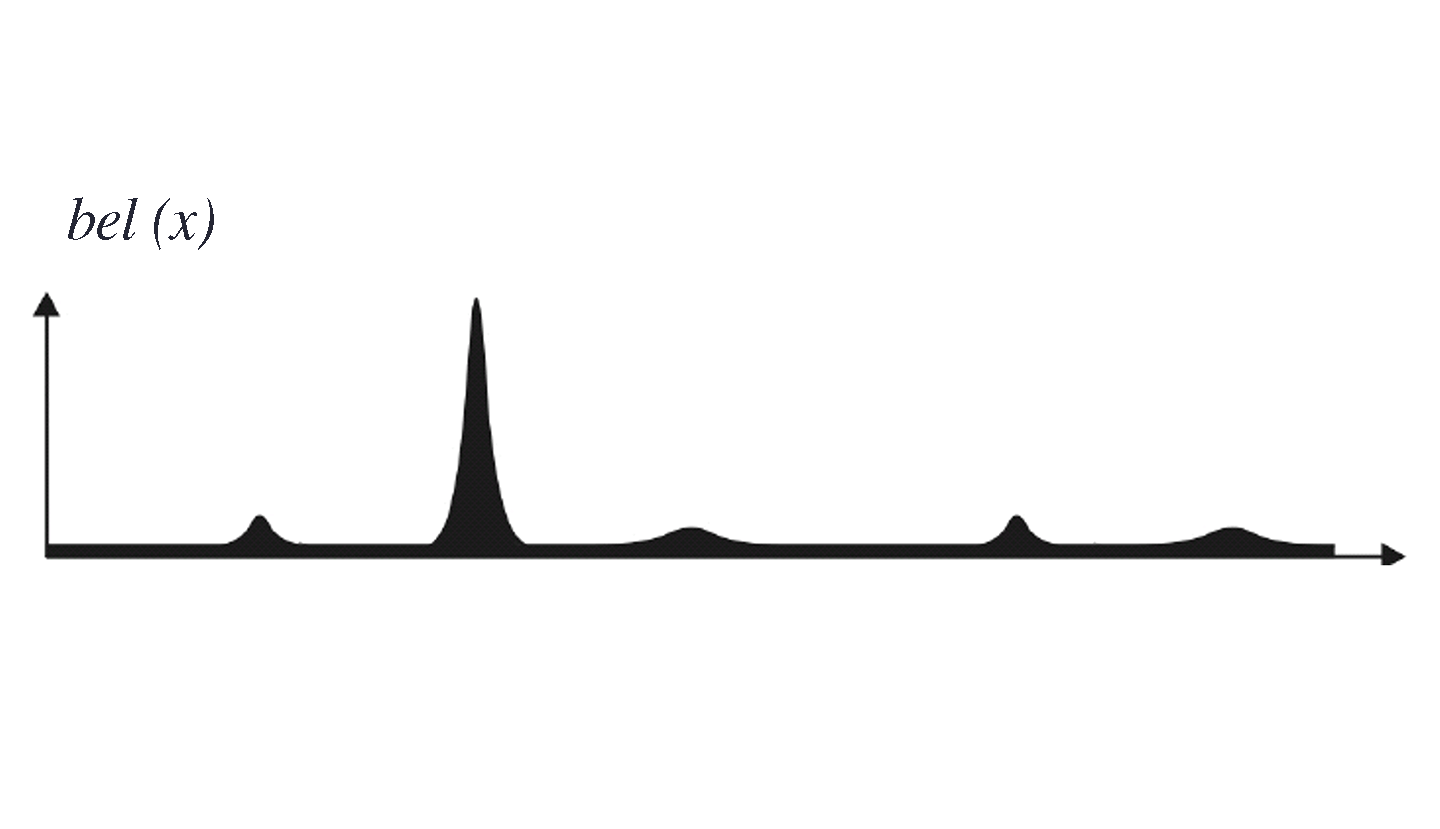

### Example probability distributions

Here we introduce you to four examples of probability distributions:

- Uniform
- Multimodal
- Dirac
- Gaussian

In the following examples, we consider a robot that is constrained to move along a straight rail i.e. the problem is one-dimensional.

The robot configuration is the position $x$ along the rail shown in Figure 5.3.

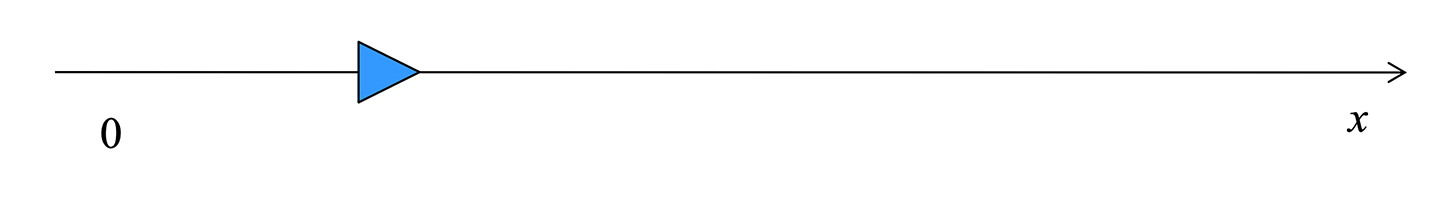

### Example 1: uniform distribution

We use this when the robot does not know where it is. It means that the information about the robot configuration is null. With uniform distribution, given a certain domain, the probability of every point is the same. Figure 5.4 below represents our one-dimensional environment of size $n$.

In this environment, with a uniform distribution, the height of the probability graph is

$$
\frac{1}{N}
$$

Because the sum of the area of the graph must add up to one.

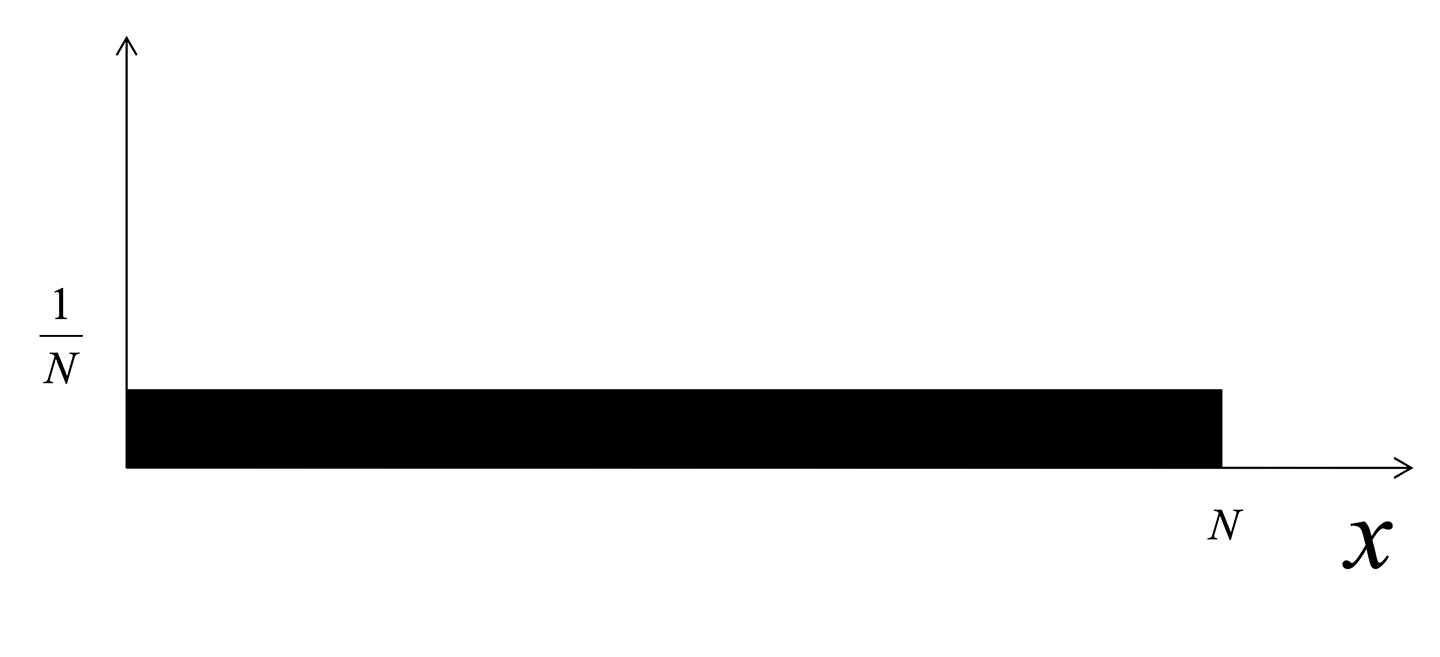

Remember that in order to be a probability distribution a function $p(x)$ **must always** satisfy the following constraint, i.e. equal one:

$$
\int_{-\infty}^{+\infty} p(x) d x=1
$$

### Example 2: Multimodal distribution

With multimodal distribution, there are certain points where we think the robot will be. In Figure 5.5 below, the robot is in the region around location $a$ or $b$.

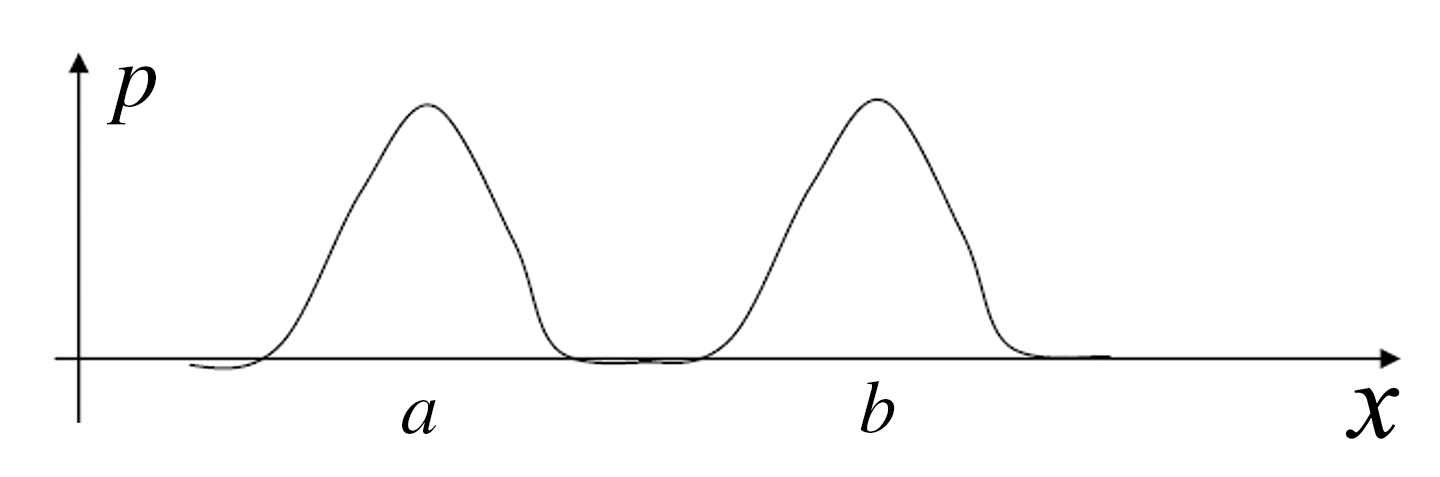

### Example 3: Dirac distribution

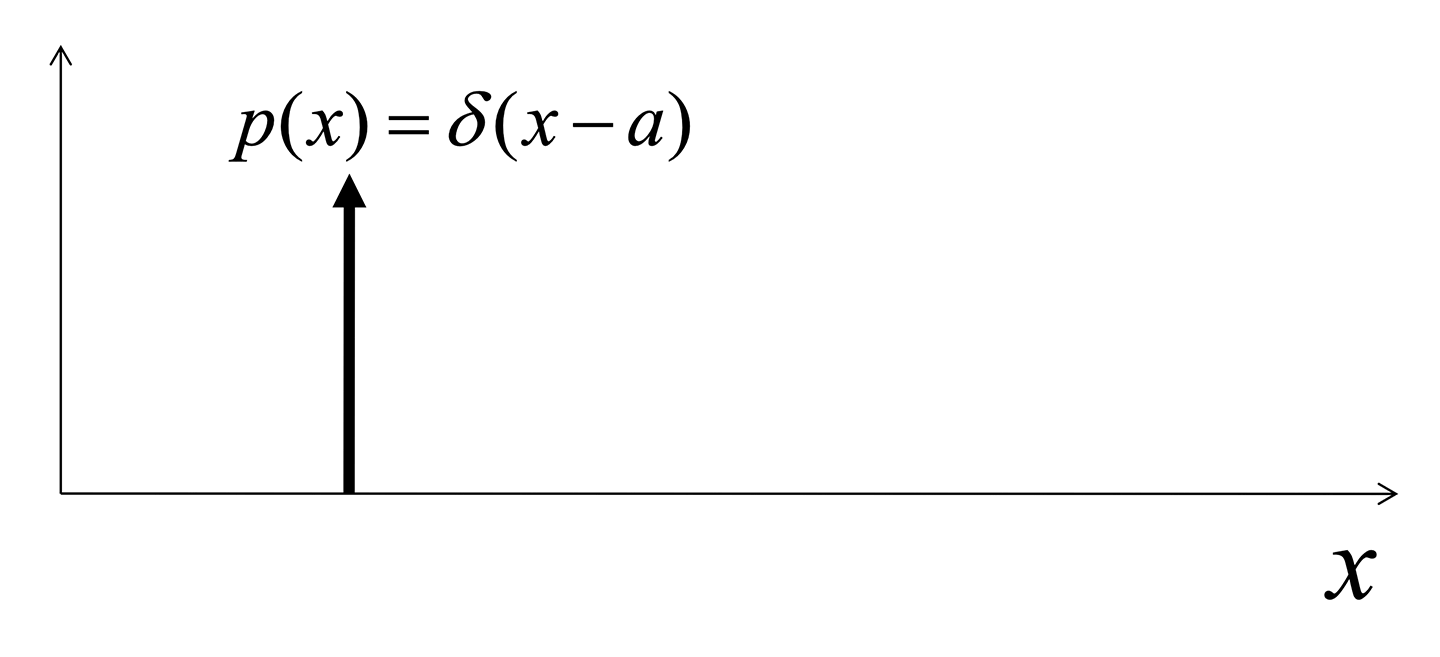

Our next example is Dirac distribution. If our robot ever knew its location perfectly then we could put a probability of 1 to that position $a$, where the robot currently is. i.e. the robot has a probability of 1.0 (i.e. 100%) to be at position $a$.

As shown in Figure 3.13, this would correspond to Dirac distribution. Note, this is represented as an upwards arrow in Figure 5.6 because it just goes infinitely high. The width of the arrow is an infinitely small point, with an infinitely high distribution at that point.

The Dirac function $\delta(x)$ is defined as:

$$
\delta(x)=\left\{\begin{array}{cc}
\infty & \text { if } x=0 \\
0 & \text { otherwise }
\end{array} \quad \text { with } \int_{-\infty}^{+\infty} \delta(x) d x=1\right.
$$

The Dirac function as infinity for $x$ is equal to zero (the argument to the Dirac function is zero). It is zero at all other points on the distribution graph where the robot could be located. The Dirac function needs to integrate to one because it is still a probability distribution.

We almost never have this with robot localization because we almost never perfectly know the robot's location.

### Example 4: Gaussian distribution

We frequently estimate robot poses in robotics using Gaussian distribution.  The Gaussian distribution has the shape of a bell and we define it using the following formula:

$$
p(x)=\frac{1}{\sqrt{2 \pi} \sigma} e^{-\frac{(x-\mu)^{2}}{2 \sigma^{2}}}
$$

We usually have a mean $μ$. This is shown in Figure 5.7 as the point along the $x$ axis with the peak of the bell curve. We have the standard deviation represented by sigma $σ$. The variance, square root of $σ$, is how wide the distribution is, shown by the horizontal arrow in Figure 5.7.

The Gaussian distribution is also called normal distribution and is usually abbreviated with $N(μ ,σ)$.

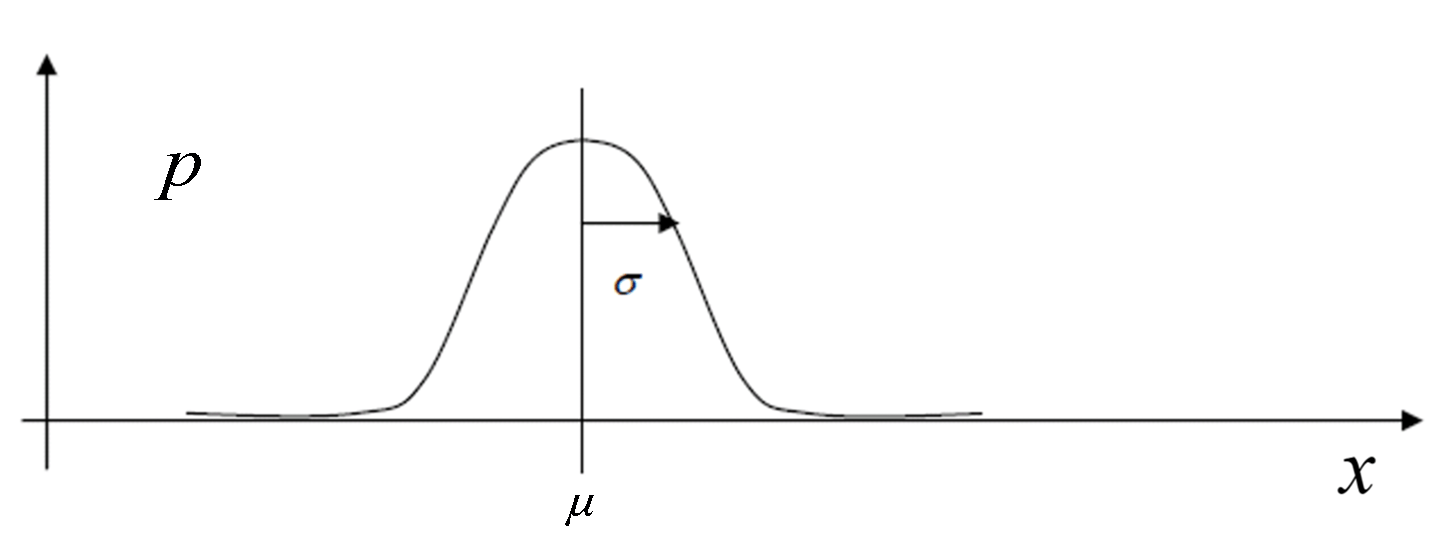

The Gaussian distribution is also called **normal distribution** and this explains why we use a capital $N$ and abbreviate it to $N(μ ,σ)$.

#### Example

For example, if you have $N(2 ,5)$.

This means that the mean is located at two along the $x$ axis and the standard deviation, or width of the bell curve either side of this is five.

### Solution to the probabilistic localization problem: action and perception updates

**In this video, we brings together all you have learnt so far about probabilistic localization methods to introduce two key steps in robot localization:**

- **the action (or prediction) update step**
- **the perception (or measurement) update step**

**The video finishes with the Bayes filter localization algorithm that solves the probabilistic localization problem. This is a longer video, so please feel free to pause it to support your learning needs.**



<iframe title="107AI_vid022_U1L3_ActionPerceptionUpdate" width="900" height="600" frameborder="0" scrolling="auto" marginheight="0" marginwidth="0" src="https://mymedia.leeds.ac.uk/Mediasite/Play/b5a3423beb08416db567cab06af5fbca1d" allowfullscreen msallowfullscreen allow="fullscreen"></iframe>

[Link to the video](https://mymedia.leeds.ac.uk/Mediasite/play/71f91a6c0b79413283adcb2103857bc51d)

The video is approximately 17-minutes long. You may wish to pause it in the middle.

<a href="https://minerva.leeds.ac.uk/bbcswebdav/xid-25172862_4" target="_blank">Download transcript (PDF).</a>

### Review "Summary of mathematics presented in the video"

Here, we summarize the algorithms for the two key steps in robot localization from the video, because you will need to remember these for the rest of Unit 1.

In robot localization, we distinguish two update steps:

**1. Action** (or prediction) update: the robot moves and estimates its position through its **proprioceptive** sensors.

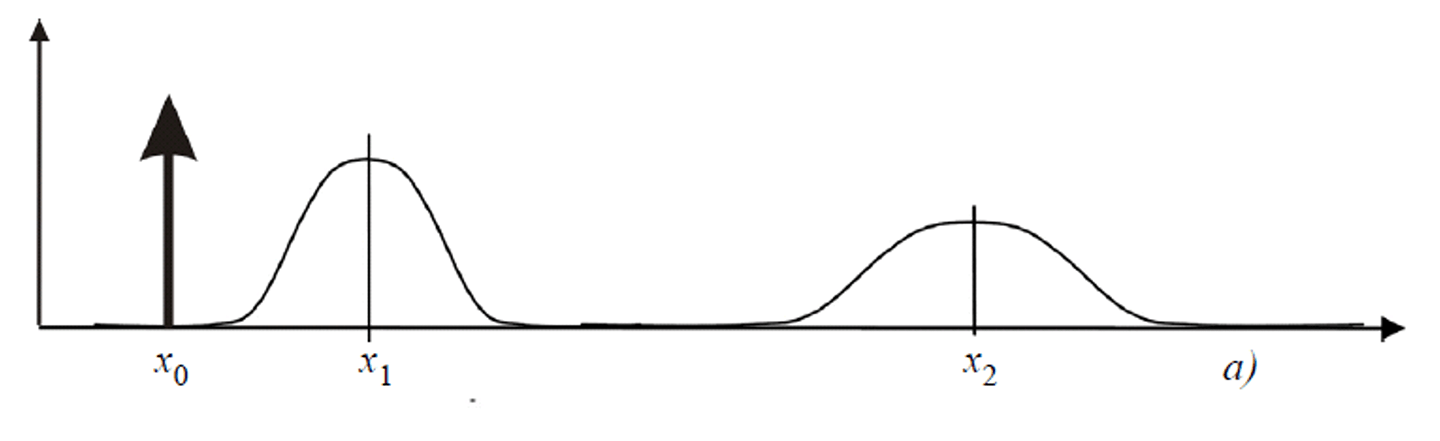

During this step, **the robot uncertainty grows**.

**2. Perception** (or measurement) update: the robot makes an observation using its **exteroceptive** sensors and corrects its position by combining its belief before the observation with the probability of making 	exactly that observation.

During this step, **the robot uncertainty shrinks**.

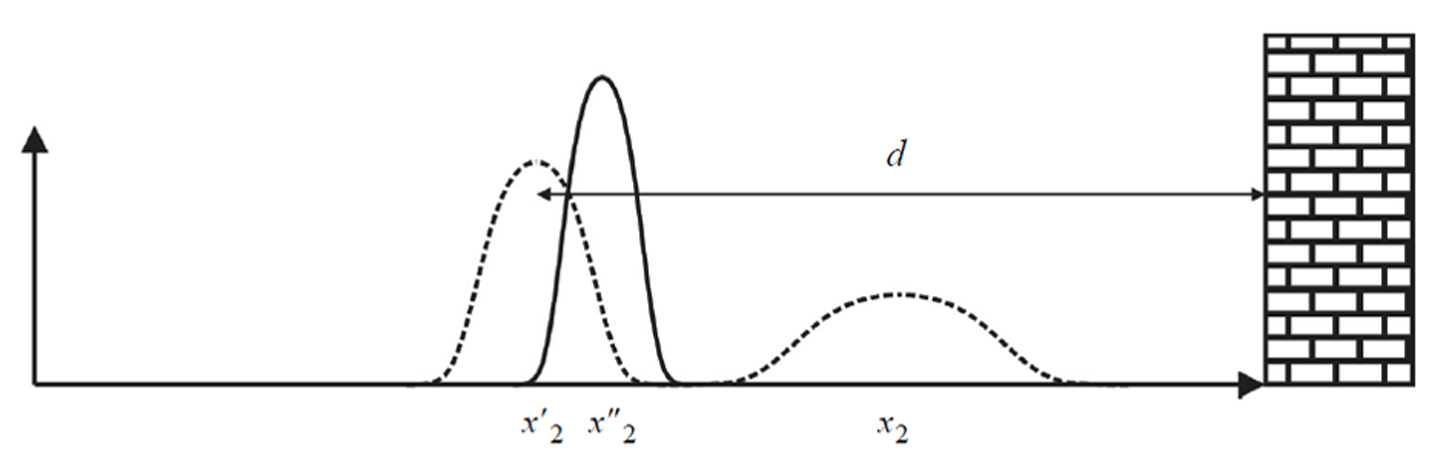

Solving the probabilistic localization problem consists in solving separately the Action and Perception updates.

How do we solve the Action and Perception updates?

**Action** update uses the Theorem of Total probability

$$
p(x)=\int_{y} p(x \mid y) p(y) d y
$$

**Perception** update uses the Bayes rule

$$
p(x \mid y)=\frac{p(y \mid x) p(x)}{p(y)}
$$

(because of the use of the Bayes rule, probabilistic localization is also called Bayesian localization).

**Bayers filter localization algorithm**

for all $x_{t}$ do

$$
    \overline{\operatorname{bel}}\left(x_{t}\right)=\int p\left(x_{t} \mid u_{t}, x_{t-1}\right) \operatorname{bel}\left(x_{t-1}\right) d x_{t-1}
$$

(action, or prediction, update)

$$
    \operatorname{bel}\left(x_{t}\right)=\eta p\left(z_{t} \mid x_{t}, M\right) \overline{\operatorname{bel}}\left(x_{t}\right)
$$

(perception, or measurement, update)

end for

return $\operatorname{bel}\left(x_{t}\right)$

**In this final video in Lesson 3, we returns to examples he used at the beginning of the lesson to demonstrate how the action and perception updates work in a real world scenario.**

The video is approximately 4-minutes long.

<a href="https://minerva.leeds.ac.uk/bbcswebdav/xid-25184365_4" target="_blank">Download transcript (PDF).</a>

[Link to the Video](https://mymedia.leeds.ac.uk/Mediasite/Play/ddd6d04831624e6aa380c87963db3b331d)

## Introduction to SLAM

For the path planning, there are different methods, namely,  global and local methods of path planning for autonomous mobile robots. A mobile robot uses these methods to simultaneously localize and generate a map (SLAM). 

In most simplest of the cases, it is assumed that the map of the environment is already available to the robot. A robot tries to localize itself in respect to something, i.e. it uses the features of the map to identify its pose. At times, a map is not available and then, it is necessary for a mobile robot to generate its own map of the environment, and use this map during localization.

Now, we consider how a robot can generate such a map. As a starting point, consider the option of you, as a robot operator, wanting to use a robot to clean your house. You could start by drawing a map by hand. You can measure the walls and objects, say, in your house, and build the map manually. You can give this map to your robot and it will use it to identify its pose. The problem with this solution is accuracy. How confident are you that you have hand drawn this map accurately enough for your robot to avoid obstacles?

For accurate localization, we must very accurately measure and include the position of all landmarks (e.g., walls, artificial beacons, etc.) that a robot uses for localising in a map. Completing this map building task is often difficult, costly and time consuming, especially for large environments. For example, a robot working in a large museum with over forty rooms will need to map every individual room.

Another consideration is a dynamic environment (i.e. the position of obstacles is changing). We will need to regularly update, re-measure and redraw a map of such an environment. Going back to the cleaner robot working in your house, you would need to re-draw the map every time you left something on the floor, didn't have time to tidy, or changed the layout of a room. This would probably be more work than doing the cleaning yourself!

A better alternative is to get a robot to do the task of map building itself: we call this **automatic map building**.

**Next, in this video, we have explained how a robot can automatically create a map of an environment using sensors.**

[Link to the Vodeo](https://mymedia.leeds.ac.uk/Mediasite/Play/f3259b261be44b6287ddd1838546ceb71d)

The video is approximately 7-minutes long.

<a href="https://minerva.leeds.ac.uk/bbcswebdav/xid-25368262_4" target="_blank">Download transcript (PDF).</a>

### Occupancy grid mapping algorithm

You are now ready to look at mathematical methods for automatic map building. One such method is **Occupancy grid mapping algorithm**. With the occupancy grid method, a robot represents a map of the environment as an evenly spaced field of cells. Each cell represents the presence or absence of an obstacle at that location in the environment.

This method relies on two observations:

- As the robot moves around an environment, it keeps a counter for every cell in the grid. You can move your robot in the environment for a long time, ideally visiting the same place over and over to account for noise. Then:

  - if a laser beam returns a **hit** for a cell, then the algorithm **increments** the counter of that cell. For example, if all the cells start as zero and the robot moves around the environment, if the robot gets a hit, it changes to one. If the same cell gets a second hit, then the counter changes to two

  - if a laser beam travels **through** a cell, then the algorithm **decrements** the counter for that cell

- When the robot has completed its survey around the environment, you can threshold the counter value in each cell, to determine whether a cell is occupied or empty. For example:

  -	if the counter value is **greater** than the threshold, particularly a cell with many hits, then you can make a reasonable assumption that it is an **occupied** cell
  -	If the counter value is **lower** than the threshold, then you can assume it is likely to be a **free cell**


### The threshold

The threshold is a parameter that you can adjust, based on how conservative you want to be about your robot bumping into an obstacle, or how unsure you are as to the accuracy of your map of the environment. A good threshold parameter has a value slightly lower than the initial counter value you start with.

The threshold accounts for a tricky scenario that can happen: it is possible for a cell to still be at its initial counter value after a robot has completed its survey of the environment. In this scenario, because the robot did not travel through this cell, we do not know if the robot will 'hit' an obstacle when it later moves through this cell, or whether it is actually a free cell.

One solution you might think will work, is to move the robot around the environment enough times to make sure every cell has either a **hit** or a **through**. In the real world, this is not possible for a number of reasons for this:

- there are always some corner cells that remain at their initial counter value
- the cell may be inside an obstacle, meaning you can never hit it, because you always hit the outer boundary of the obstacle
- or the cell may be in an area which your robot has not explored

This means that the safest thing to do in this scenario is for you to mark as occupied, all cells still at their initial counter value at the end of the mapping.

For example, if the initial counter value is zero, the free cell counter value is one, and the occupied counter value is two, then after using your threshold parameter, all the cells still showing as zero will be converted to two. As your robot continues to move around the environment, it will continually update these counters to increase the accuracy of the map. This method is also useful for a dynamic environment, so that, if an obstacle moves in an environment, the counter value for those cells will automatically start decreasing.


**Example "Example: Your cleaning robot"**

For example, if your cleaning robot is mapping your bedroom and you decide to move your bed from one corner into the middle of the wall. To start with, the counter had many hits in the corner of the room. Your robot rightly thinks there is an obstacle in the corner. Later, your robot gets many through in that same corner. It will gradually decrement the contours and, after a while, it realizes that the corner is now free for it to use.


**In this video, we first gives an example of a map built by a robot using its senses to complete automatic map building. Then he reviews the assumptions we made when we followed the process of occupancy grid mapping in the first video in this lesson.**

[Link to the Video](https://mymedia.leeds.ac.uk/Mediasite/Play/fbcf784f7a2248009a4242552a585fc41d)

The video is approximately 4-minutes long.

<a href="https://minerva.leeds.ac.uk/bbcswebdav/xid-25365947_4" target="_blank">Download transcript (PDF).</a>

## 1.4 Simultaneous localization and mapping (SLAM)

Localization and Mapping are like chicken and egg. Both require each other to exist.

- If you have a good map, then you can perform good localization using the methods we discussed in Unit 1.

- If you have good localization (perhaps through artificial markers you put on your robot and a special camera in the environment), then you can construct a good map.

If you do not have a good map, and you do not have artificial markers for your robot, what can you do?

For example, you place a Turtlebot in a new room at the start of a session. You do not have an environment map and you do not accurately know the location for your robot, what can you do at this starting point when you do not have any information?

The solution is to try building the map and localising the robot at the **same time.**

There are algorithms that try to build the map and localize simultaneously. We call them **simultaneous localization and mapping**, or **SLAM**, algorithms.

**In this video, we explained the idea of SLAM before we discuss SLAM algorithms in the next step of this lesson.**

<iframe title="107AI_vid031_U2L1_SLAMidea" width="900" height="600" frameborder="0" scrolling="auto" marginheight="0" marginwidth="0" src="https://mymedia.leeds.ac.uk/Mediasite/Play/98a624116891482594ba5b9efeeb086d1d" allowfullscreen msallowfullscreen allow="fullscreen"></iframe>

[Link to the Video](https://mymedia.leeds.ac.uk/Mediasite/Play/98a624116891482594ba5b9efeeb086d1d)

The video is approximately 10-minutes long.

<a href="https://minerva.leeds.ac.uk/bbcswebdav/xid-25388914_4" target="_blank">Download transcript (PDF).</a>

### SLAM algorithms

In this lesson, we have introduced you to the high-level general idea of SLAM. There are different algorithms implementing this general SLAM idea.

One algorithm is called Particle Filtering SLAM, which extends the Particle Filter Localization (Monte Carlo Localization) to SLAM.

All these algorithms keep a belief (a probability distribution) about the robot pose **and the structure of the map.** This is different to what we learnt in Unit 1, where the belief was only about the robot’s pose.

For example, in Particle Filtering SLAM, each particle is not only a hypothesis for the pose for the robot, but is also a hypothesis about the structure of the map (e.g. occupancy of cells, or location of features).

**In this video, we showed you an example SLAM environment map created by Sebastian Thrun using Particle Filtering SLAM. Sebastian was the first director of the Google Car Project.**


[Link to the Video](https://mymedia.leeds.ac.uk/Mediasite/Play/5c2c516ce04141d6ad232654ad3477aa1d)

The video is approximately 5-minutes long.

<a href="https://minerva.leeds.ac.uk/bbcswebdav/xid-25402278_4" target="_blank">Download transcript (PDF).</a>

### Autonomous car technology

These SLAM algorithms are at the heart of today’s autonomous car technologies.

You can read more about driverless cars in these press releases (all open in a new browser tab):

<a href=" https://www.bbc.com/future/article/20211126-how-driverless-cars-will-change-our-world" target="_blank">BBC: How driverless cars will change our world</a>.

<a href="https://www.theguardian.com/technology/2016/sep/14/uber-self-driving-cars-pittsburgh-ford-fusion#:~:text=Uber%20riders%20in%20Pittsburgh%20can%20now%20get%20a%20glimpse%20of,participate%20in%20a%20test%20program." target="_blank">The Guardian: Uber riders in Pittsburgh can hail self-driving Ford Fusions in test program</a>.

<a href=" https://www.bbc.co.uk/news/technology-37418119" target="_blank">BBC: US releases highway code for robots</a>.


## Further Reading

For a detailed understanding of classical robotics localization algorithms and how to approach this problem further, see these two books

- 1. Introduction to Autonomous Mobile Robots (Siegwart et. al, 2011)
- 2. Introduction to AI Robotics, 1st and 2nd Edition, Robin R Murphy (Murphy, 2000, 2019)


## Lesson complete

Having completed this lesson, you should be able to recall there are four main sources of uncertainty for a robot’s location:

- **initial pose uncertainty** because it is not easy to know a robot's start pose in the environment
- **effector noise** also called motion noise, motion uncertainty and actuator uncertainty
- **sensor noise** the actual errors that your sensor makes
- **sensor aliasing** when your environment looks similar from different positions
- explain why it is important for a robot to have a map of its environment so that it can navigate and avoid obstacles
- describe fundamental methods and algorithms that we use for a robot to localize its pose in an environment
- discuss the benefits and challenges of methods for creating a map of an environment for a robot
- outline the key benefits of Simultaneous localization and mapping, or SLAM
- recall applications for the SLAM algorithm, including its use in autonomous car technology

**Select the next button to continue.**

[Back to TOC](IntroductionTOC.ipynb)